# Lab 1 - Intrinsic Explainable Models

#### Topics:
- Familiarize yourself with the libraries
- Load the Data
- Perform Basic Exploratory Data Analysis
- Using Intrinsic Explainable Models
- Intrinsic Model Experiments

## 1) Familiarize yourself with the libraries
a) Read the description of the libraries that are used and what is the purpose of each in the

In [65]:
import os  # python default library to implement os tasks, such as reading and creating file paths from the disk.
import sklearn  # library with multiple machine learning models implemented already to be used for ease

import numpy as np  # A staple in python math functions
import pandas as pd  # A staple in python data processing and data science
import seaborn as sns  # A library with many pre-configured plots to reduce time to plot data

import matplotlib.pyplot as plt  # The library which has implemented most of the plots

from sklearn.model_selection import train_test_split  # A utility method made for splitting training and testing data

from sklearn.linear_model import LogisticRegression  # the models implemented by sklearn
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score  # accuracy metrics

# Exercise 2

### a) Add the name of the file, and it’s format.

In [66]:
FMT = 'csv'  # TODO: fill in the file format
FILE_NAME = 'heart'  # TODO: fill in the file name of the data set

PATH_TO_DIR = os.getcwd()
PATH_TO_FILE = os.path.join(PATH_TO_DIR, f'{FILE_NAME}.{FMT}')

### b) Find the method in ”pandas” libraries to read this file format.
[Reference to pandas io submodule](https://pandas.pydata.org/docs/reference/io.html)

In [67]:
read_method = pd.read_csv  # TODO: replace with pd.read_ method found from the pandas library
heart_data = read_method(PATH_TO_FILE)

### c) Explain the following default arguments for the read method and how they link to the data being imported:

#### i) Explain the use of ‘sep’ or ‘delimiter’ argument.
#### ii) Explain the use of ‘header’ argument
#### iii) Explain the use of ‘decimal’ argument and its importance in financial data sets.

Note: to be able to explain AI methods, it is also important to have good data analyst skills, since if the data we use can not be explained or is imported incorrectly, we are then trying to explain meaningless result

##### Answers:

i) 'sep/delimiter' is the separator used in csv files to separate cells, in our cause sep is ','

ii) header defaults to 'infer', which means it infers the name of the columns from the dataset. You can also give it a number/sequence of numbers, which it uses to indicate which row(s) the header are on and where the data starts

iii) what separator is used for floating point numbers, default is '.'

In [68]:
heart_data.head()  # Print the first five records to see the data that you have loaded

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In practice this is printed to make sure the row indices are imported correctly and the columns of the data are correct.

In the next cells we make sure the data is clean, although for these labs only clean data is given since this is not a learning objective of the module, but it is important to be consistent with these steps.

## 3) Perform Basic Exploratory Data Analysis

For our exercise we want to explain the classification from the first 13 attributes to predict the target class, if there is a heart disease or not.

In [69]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [70]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### a) From your theory explain which model(s) can be used for a classification task.

### Decision tree
A decision tree could be used in this case, as it could learn which attributes would make you likely to have heart disease

### kNN
kNN would work, because it would look if you have similar characteristics to other people with heart disease, and it could compare it to other cases when it classifies a certain datapoint

### b)  If for some reason you were limited to using only a few attributes, for instance choose 5 out of 13 attributes from the data set to train a model, how would you choose those attributes? (note: we can not use any advanced XAI methods yet since they require a trained model)

HINT: this method’s result can be shown using a heatmap.

##### Answer:
We can use the correlation coefficients between the data and the target label and see which attributes affect the target label the most. We can then use the top 5 from there.

### c) How does the answer the previous question assist the explanation of the model.

##### Answer:
You can look at the most useful attributes and their values, and explain the model that way. Also if you only have 5 attributes instead of 13, it makes the model easier to understand.

### d) Perform the method in your answer to question 3) b).

Use matplotlib.pyplot.figure() for creating a figure and appropriate method in pandas library for the stated method's calculation then use seaborn.heatmap(*arguments) with appropriate arguments to display the results of the calculation.

[MatPlotLib.PyPlot.Figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)
[Pandas Library Method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)
[Seaborn Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

<Axes: >

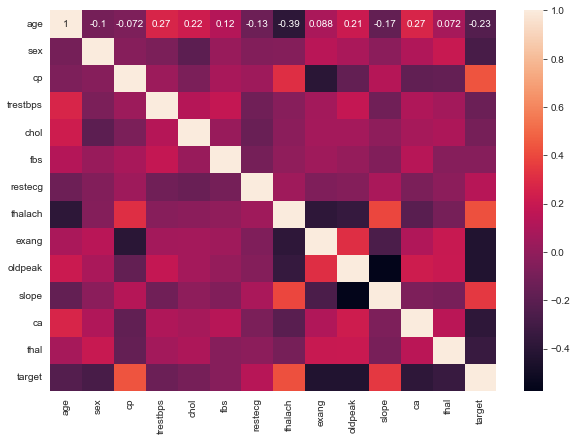

In [71]:
# TODO: create a new figure
# TODO: Use the method from pandas to perform the method on the data
# TODO: Use Seaborn's Heatmap method to show the results.
plt.figure(figsize=(10, 7))
corr_matrix = heart_data.corr()
sns.heatmap(corr_matrix, annot=True)

### e) What are the top 5 most “explainable” attributes for the target class?

In [72]:
# TODO: write code to find what you consider to be the top 5 explainable attributes
attributes: pd.Series = abs(corr_matrix["target"].copy(deep=True))
print("Attributes with the highest target label correlation: ")
print(attributes.sort_values(ascending=False)[1:6])

Attributes with the highest target label correlation: 
oldpeak    0.438441
exang      0.438029
cp         0.434854
thalach    0.422895
ca         0.382085
Name: target, dtype: float64


#### Answer:
oldpeak, exang, cp, thalach, ca

## Split the data into Train and Test Sets

For the models, we need to make a split of the train and test data sets.

In [73]:
data = heart_data.drop('target', axis=1)
labels = heart_data.target
data.shape, labels.shape

((1025, 13), (1025,))

In [74]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
X_train.head(3)

(820, 13) (205, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
315,42,1,3,148,244,0,0,178,0,0.8,2,2,2
204,66,0,2,146,278,0,0,152,0,0.0,1,1,2
363,53,1,2,130,246,1,0,173,0,0.0,2,3,2


## 4) Using Intrinsic Explainable Models

### a) Train a Logistic, Tree, and kNN model on the training data.

[Logistic Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
[Decision Tree Model](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
[kNN Model](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [75]:
log_model = LogisticRegression()  # TODO: initialise the logistic model with default parameters.
tree_model = DecisionTreeClassifier()  # TODO: initialise the decision tree with default parameters.
knn_model = KNeighborsClassifier()  # TODO: initialise the knn model with default parameters.

In [76]:
# TODO: fit each of the models.

log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

print("Complete")

Complete


C:\Users\Paul\PycharmProjects\XAI_Labs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Predictions and Evaluation

In [77]:
predictions_log = log_model.predict(X_test)
predictions_tree = tree_model.predict(X_test)
predictions_knn = knn_model.predict(X_test)

log_score = f1_score(y_test, predictions_log, average='macro')
tree_score = f1_score(y_test, predictions_tree, average='macro')
knn_score = f1_score(y_test, predictions_knn, average='macro')

print(f'{log_score=}, {tree_score=}, {knn_score=}')

log_score=0.8616734143049933, tree_score=1.0, knn_score=0.7461904761904761


### b) List the parameters that were fit in the logistic regression model and write a brief explanation on what these parameters represent in a logistic model.

Hint: [Read the article](https://quantifyinghealth.com/interpret-logistic-regression-intercept/)

In [78]:
# TODO: list the coefficients and explain how can they be interpreted.
for index in range(len(log_model.coef_[0])):
    print(f"{log_model.feature_names_in_[index]} : {log_model.coef_[0][index]}")

age : 0.009472818969543072
sex : -1.5686873347602608
cp : 0.7784115412576692
trestbps : -0.012300735848954964
chol : -0.004005036865994739
fbs : -0.11233578882097
restecg : 0.6733872486371018
thalach : 0.030856931999077873
exang : -0.8445989914274842
oldpeak : -0.5971474892162973
slope : 0.411407140511451
ca : -0.673342667370747
thal : -0.8054048494786802


##### Answer:
In a logistic regression model, the coefficients are used to model the log-odds of an event happening. For example, if we take the attribute "sex" and we have 0 representing men and 1 representing women in the data, the age coefficient represents how the log-odds change when the "sex" variable goes from a 0 to a 1. This would indicate that men are more likely to develop heart disease.

### c) Produce a decision tree from the trained model something that a person can use to explain a decision of the model.

[Reference to scikit.tree Submodule](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)

C:\Users\Paul\AppData\Local\Temp\ipykernel_12148\3600650475.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


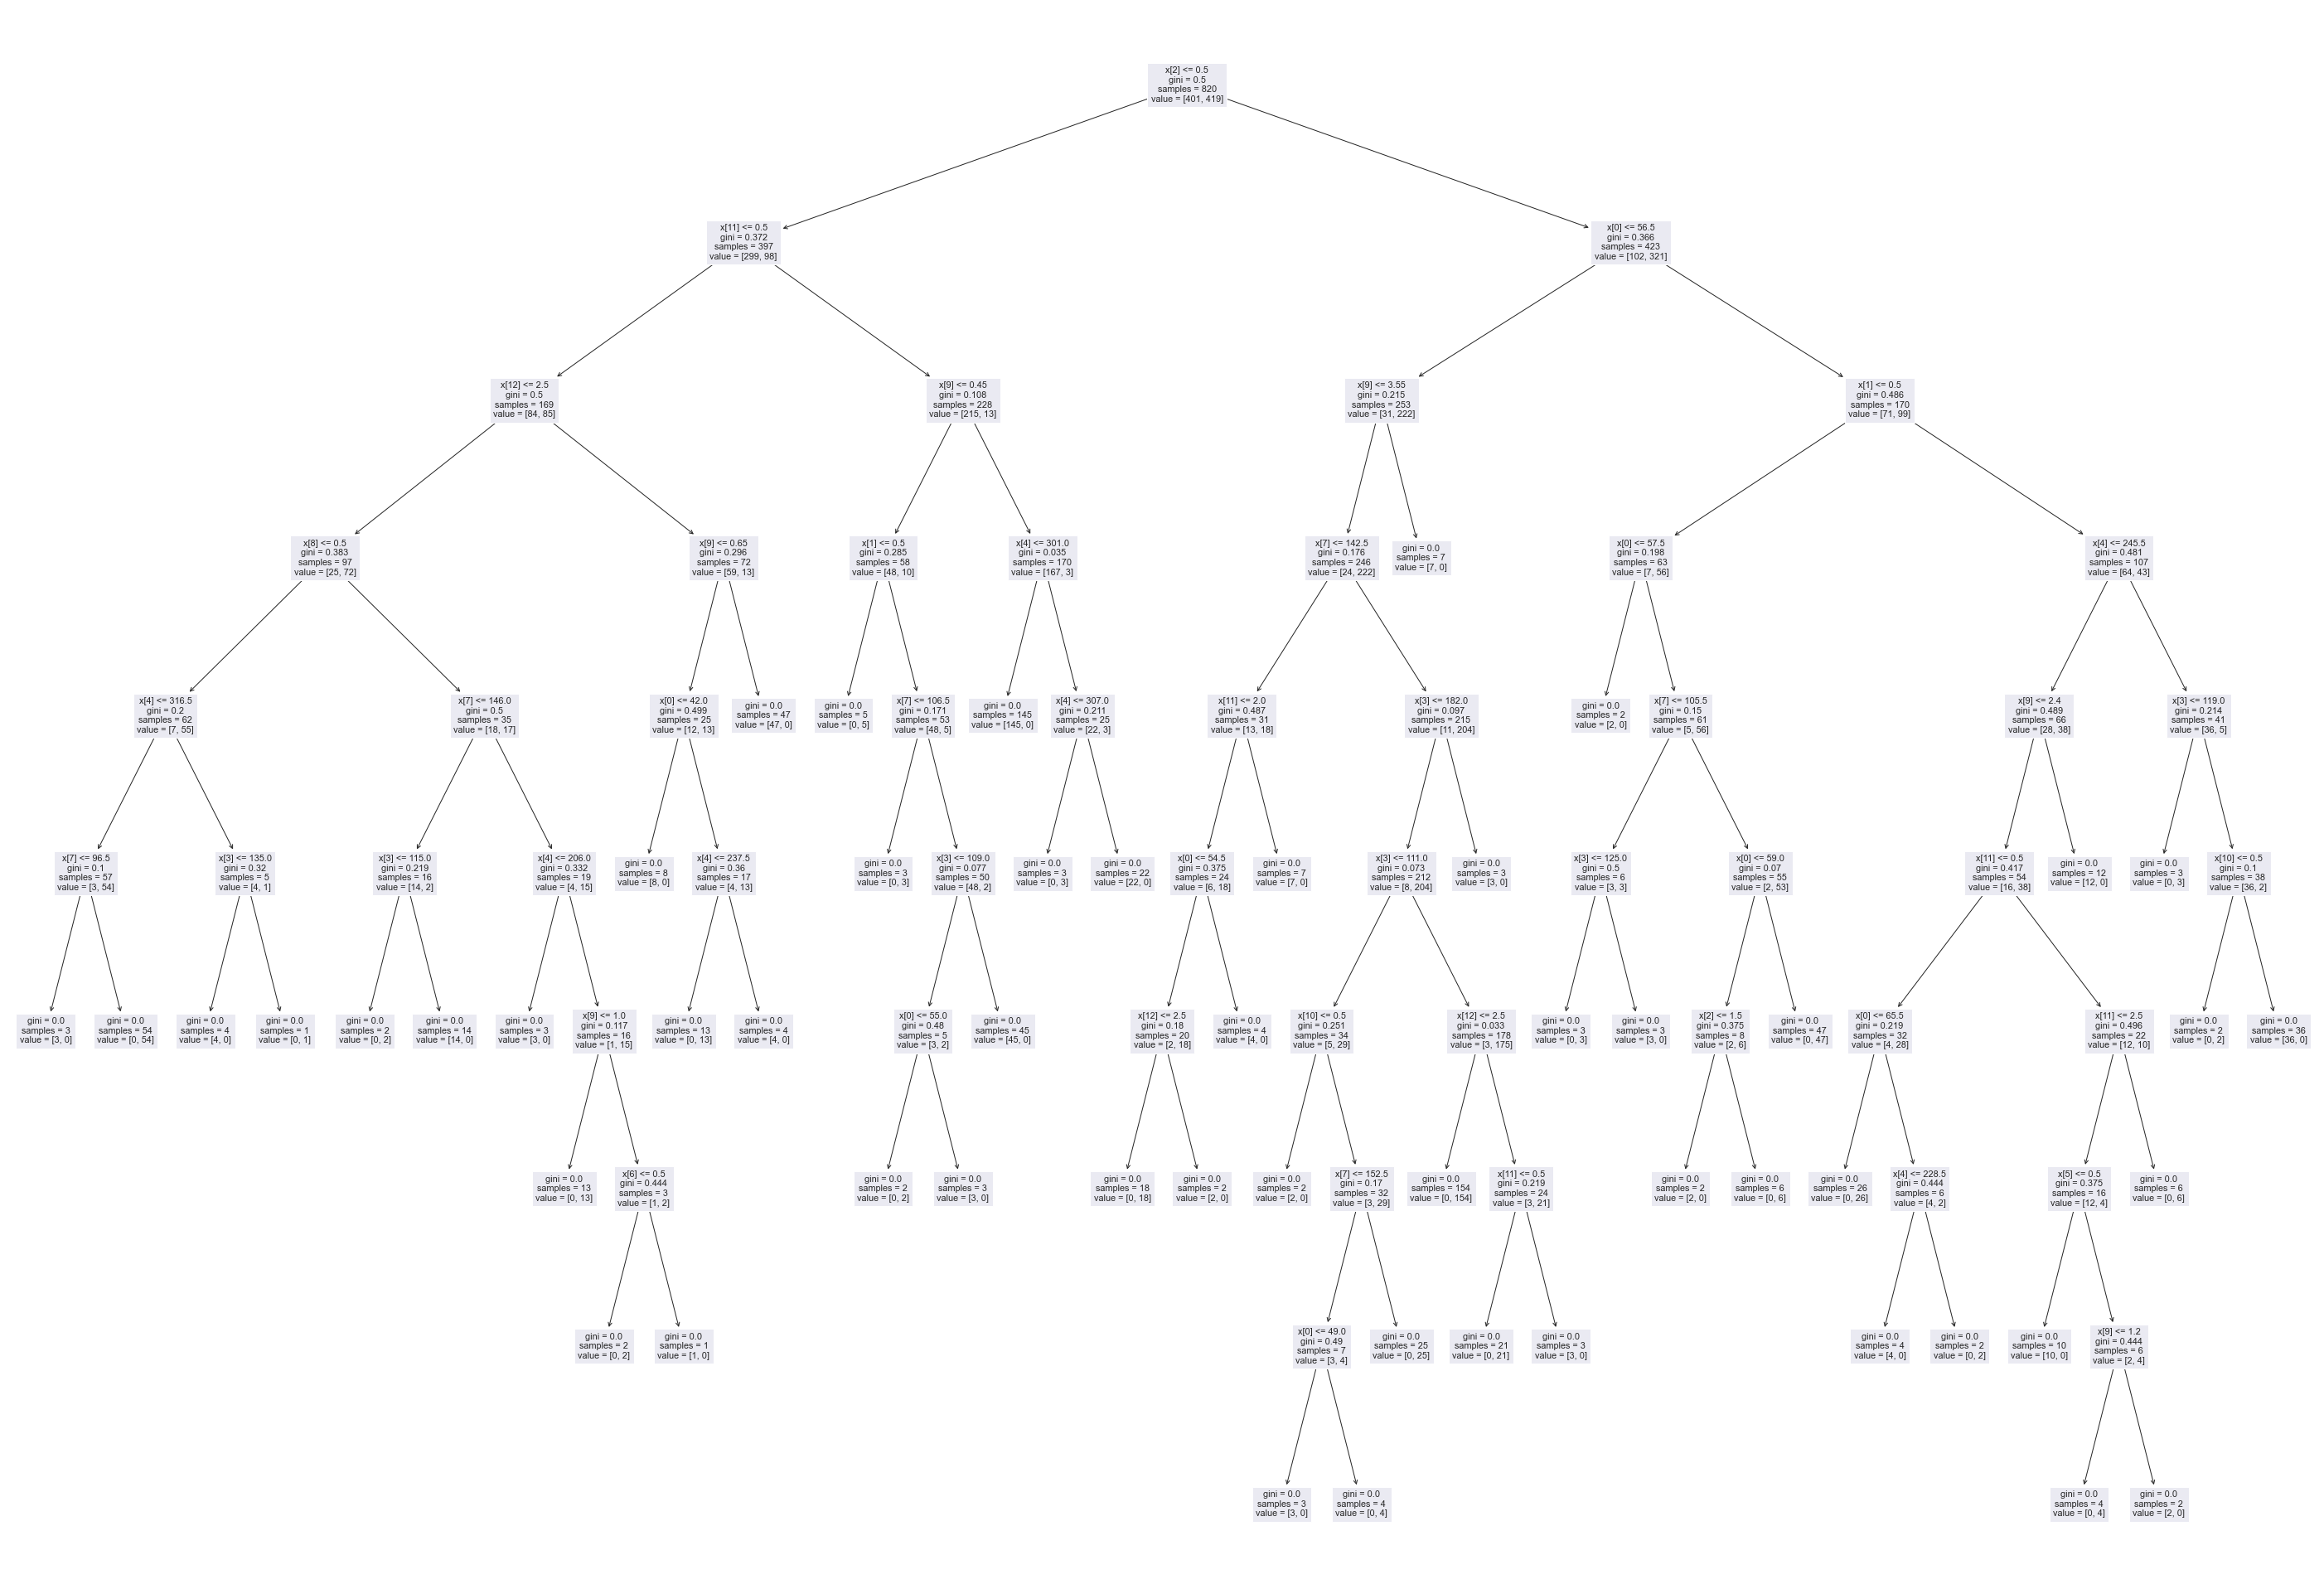

In [81]:
# create a new figure
fig = plt.figure(figsize=(50, 35), facecolor="white")
# Use the method from sklearn.tree to plot the decision tree
plot_tree(tree_model)
# show the figure
fig.show()

### d) Explain the importance of different parameters values in Decision Trees and kNN models.

##### Answer:
In both decision trees and kNN models, the different parameter values can have a very big effect on how fast the model learns and how good its accuracy is (especially on unseen data). For example, in the decision tree there is a parameter called "max depth", which directly influences how complex your decision tree can be, thus greatly influencing the capabilities of your model.

## Intrinsic Model Experiments

### a) Use different methods of splitting for Decision Tree. Plot the different accuracies and comment on how each split is different.

In [80]:
new_tree_model = DecisionTreeClassifier(criterion="log_loss", splitter="random", max_depth=9)
new_tree_model.fit(X_train, y_train)
new_predictions_tree = new_tree_model.predict(X_test)
new_tree_score = f1_score(y_test, new_predictions_tree, average='macro')
print(new_tree_score)

0.9511253099370589


#### Answer
Only changing the criterion and the splitter did not change the performance, the model still had a 100% accuracy. To actually see a difference, we had to handicap it by setting max_depth to 9 and max_features to 1.

After doing this and playing around with different criterion and splitters, we found that only the change from "best" to "random" had a slight decrease to the accuracy of the model

### b) Plot the accuracy scores for different values of k in the kNN model and comment on how the explanation changes with different values of k.

In [64]:
for i in range(1, 10):
    new_tree_model = KNeighborsClassifier(n_neighbors=i)
    new_tree_model.fit(X_train, y_train)
    new_predictions_tree = new_tree_model.predict(X_test)
    new_tree_score = f1_score(y_test, new_predictions_tree, average='macro')
    print(f"{i}: {new_tree_score}")

1: 1.0
2: 0.9512183514182372
3: 0.9120926243567753
4: 0.8188916214990092
5: 0.7461904761904761
6: 0.7496947496947497
7: 0.7215271323371701
8: 0.736579097658481
9: 0.7556265496852947


#### Answer


# Lab 2 - Model Agnostic Methods

#### Topics:
- Permutation Importance
- KernelSHAP
- Dependence Plot
- Model Agnostic Methods Experiment

In [ ]:
import shap  # The library with the methods for SHAP implemented

from sklearn.inspection import permutation_importance  # the method which has implemented the permutation importance
from sklearn.inspection import PartialDependenceDisplay  # the method that can be used for two variables PDP

## 1) Permutation Importance

[Reference to scikit.inspection submodule](https://scikit-learn.org/stable/modules/partial_dependence.html#partial-dependence-plots)

### a) Perform Permutation Importance for logistic model for all the attributes and plot the results. Give a brief interpretation of your results.

In [ ]:
result = ()  # TODO: perform the permutation importance on the logistic model using the train data
perm_sorted_idx = result.importances_mean.argsort()  # arrange the results by the descending order of the mean.

fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))

ax1.title.set_text('Permutation Importance')
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=X_test.columns[perm_sorted_idx])
fig.tight_layout()
plt.show()

### b) Explain which model is most likely to be show a bigger difference in prediction when using permutation importance.

##### Answer:

### c) Perform Permutation Importance for two features.
i. Choose the most explainable features and motivate why you have chosen these two features.
ii. Run the permutation importance for each model. Comment on the differences.

[Reference to Sub Module](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html)

In [ ]:
print('Computing partial dependence plots...')

for fit_model in [log_model, tree_model, knn_model]:
    fig, ax = plt.subplots(figsize=(5, 5))  # TODO: initialise a figure

    column_one = X_test.columns[]  # TODO: choose a column
    column_two = X_test.columns[]  # TODO: choose a column

    PartialDependenceDisplay.from_estimator(fit_model, X_test, [(column_one, column_two)], n_jobs=3, grid_resolution=20, ax=ax)
    ax.set_title(f'Partial Dependence Plot - {fit_model=}')
    plt.show()

## 2) KernelSHAP

##### Note: You will need to have the jupyter notebook to be trusted to use the javascript methods.

[Reference to shap Library](https://shap.readthedocs.io/en/latest/index.html)

### a) Use a SHAP Explainer to derive SHAP Values for the logistic regression model.

[Reference to KernelSHAP](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.KernelExplainer.html)

In [ ]:
# We need to artificially reduce the number of data points due to computational infeasibility
background = X_train.sample(n=82)

explainer = ()  # TODO: Use the KernelSHAP method with log_model.predict and background as the parameters.
# background can be replaced with X_train as well but that takes much longer
shap_values = ()  #TODO: find the shap_values from the explainer.

### b) Plot a SHAP summary plot using the bar chart using all the features in the data and explain the results of the plots.

In [ ]:
# TODO: plot the summary plot as a bar chart

### c) Plot the partial dependence plot using the SHAP values for the attribute 'exang' and explain how to interpret the plot.

In [ ]:
# TODO: plot the dependence plot

### d) Plot a 'force plot' (part of shap library) for a random X_test data point, and explain the figure.

In [ ]:
shap.initjs()  # print the JS visualization code to the notebook

# TODO: plot the force_plot

##### Explanation

In [ ]:
explanation_contribution = pd.DataFrame(shap_values, columns=X_test.columns)
explanation_contribution.describe()

This returns a matrix of SHAP values (# samples, # features). Each row sums to the difference between the model output for that sample and the expected value of the model output (which is stored as expected_value attribute of the explainer).

### e) Plot the summary plot for each of the attributes and give an interpretation of the plot.

In [ ]:
# TODO: plot the summary plot but not as a bar chart.

## 3) Dependence Plot

### a) Plot a dependence plot to show the effect of ‘chol’ across the whole dataset.

In [ ]:
shap.initjs()  # initialise the js for the dependence_plot method
# TODO: plot the dependence plot

##### Explanation:


### b) Plot the two-way PDP showing interactions between features ‘Resting blood pressure’ and ‘Chest pain type’ and explain their effect.

In [ ]:
# TODO: initialise the js for shap
# TODO: plot the dependence plot but this time for two features

##### Explanation:


## 4) Perform the same analysis as above for a model of your choice (other than the Logistic Model) and comment on the sensitivity of the two models by comparing and contrasting the results.

# Lab 3 - Explaining Deep Learning Models

#### Topics:
- Occlusion
- Unsupervised Explainers
- Gradient Based Explainers
- DeepSHAP (DeepLift)
- Attacks and Defence using Adversarial Features

In [ ]:
import torch

torch.manual_seed(0)
import torchvision
import torchvision.models as models
from IPython.display import display
import PIL
import ast
import cv2

from utils import preprocess_image

In [ ]:
resnet_model = models.resnet18(pretrained=True)
resnet_model.eval()

In [ ]:
IMAGE_NET_CLASSES_FILE = 'imagenet_classes'
IMAGE_NET_CLASSES_FILE_FMT = 'txt'

with open(os.path.join(os.getcwd(), f'{IMAGE_NET_CLASSES_FILE}.{IMAGE_NET_CLASSES_FILE_FMT}'), 'r') as f:
    classes = ast.literal_eval(f.read())
# look up the classes from here when needed below
print(classes)

In [ ]:
IMAGE_DIR = 'test_images'
IMAGE_DIR_PATH = os.path.join(os.getcwd(), IMAGE_DIR)
PICTURE_FMT = 'jpg'

to_image_path = lambda file_name: os.path.join(IMAGE_DIR_PATH, f'{file_name}.{PICTURE_FMT}')

## 1) Occlusion

### a) Use the provided starter code to generate areas of importance in classification of random images.

##### Use the Heatmap to explain qualitatively how well the pre-trained model is able to understand the object of the image.

We have given a running example for a basketball image, but continue your exploration for all other images in the directory.

In [ ]:
# Starter Code for Creating Occlusions and Generating a Combined HeatMap Image- Note there are better ways of making occlusions by using data augmentation libraries but we want to keep our focus away from those techniques at the moment.

loss_function = torch.nn.MSELoss()


def generate_area_importance_heatmap_with_occlusions(image, annotation, block_size=14):
    image = np.array(image)

    height, width, channels = image.shape

    columns = width // block_size
    rows = height // block_size

    heatmap = np.zeros((columns, rows))

    for row in range(rows):
        for column in range(columns):
            x = column * block_size
            y = row * block_size

            top = int(y)
            left = int(x)
            right = left + block_size
            bottom = top + block_size

            tmp_image = np.copy(image)

            noise = np.random.rand(block_size, block_size, 3) * 255
            tmp_image[int(top):int(bottom), int(left):int(right)] = noise
            tmp_image = PIL.Image.fromarray(tmp_image)

            preprocessed_image = preprocess_image(tmp_image)
            prediction = resnet_model(preprocessed_image).clamp(min=-1, max=1)
            loss = round(float(loss_function(prediction, annotation)), 4)

            heatmap[column, row] = loss

    heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())
    heatmap = np.clip(heatmap, 0, 1)
    heatmap = heatmap * 255
    heatmap = np.uint8(heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    heatmap = cv2.resize(heatmap, (width, height), interpolation=cv2.INTER_NEAREST)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    overlayed = cv2.addWeighted(image, 1, heatmap, 0.75, 0)
    combined = np.concatenate((image, heatmap, overlayed), axis=1)

    return combined

In [ ]:
PINEAPPLE_TEST_IMAGE_PATH = to_image_path('pineapple')
BASKETBALL_TEST_IMAGE_PATH = to_image_path('basketball')
SUBMARINE_TEST_IMAGE_PATH = to_image_path('submarine')
ZEBRA_TEST_IMAGE_PATH = to_image_path('zebra')
SUB_AIRCRAFT_CARRIER_IMAGE_PATH = to_image_path('submarine_and_aircraft_carrier')

TEST_IMAGE = PIL.Image.open(BASKETBALL_TEST_IMAGE_PATH)
display(TEST_IMAGE)
preprocessed_image = preprocess_image(TEST_IMAGE)

output = resnet_model(preprocessed_image)
occlusion_importance_heatmap = generate_area_importance_heatmap_with_occlusions(np.array(TEST_IMAGE), output)
display(PIL.Image.fromarray(occlusion_importance_heatmap))

##### Explanation

### b) Explain what is important in chosen data set, so that what we as humans intuitively use to identify objects, can be learnt by the machine.

Hint: refer back to lecture with example of on mis-classification.

##### Answer:


## 2) Unsupervised Explainers

Note: This does not require a deep learning model.

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Load Digits dataset
X, y = datasets.load_digits(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=0
)

dim = len(X[0])
n_classes = len(np.unique(y))

### a) Using PCA find the number of dimensions (axis) with the most variance (i.e. the components have at least 0.1 variance)

In [ ]:
pca_results = PCA(n_components=0.95)  # initialise PCA method
# TODO: fit PCA
print(pca_results.explained_variance_ratio_[:10])  # print the internal calculations

### b) Perform PCA and t-SNE on the Fashion-MNIST dataset using the given the starter code.

In [ ]:
# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=0))
tSNE = ()  #TODO: add method for tSNE with 2 components, random initialisation and perplexity 3 and auto learning rate.

dim_reduction_methods = [("PCA", pca), ("tSNE", tSNE)]

for i, (name, dim_reduction_model) in enumerate(dim_reduction_methods):
    plt.figure()

    # TODO: Fit the method's model

    # Embed the data set in 2 dimensions using the fitted model
    if name == "PCA":
        X_embedded = dim_reduction_model.transform(X)
    else:
        X_embedded = dim_reduction_model.fit_transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap="Set1")
    plt.title(f"{name}")
plt.show()

### c) Explain what can be interpreted using an unsupervised method like this in explaining an incorrect classification.

##### Answer:


## 3) Gradient Based Explainers

In [ ]:
from utils import preprocess_image, overlay_heatmap_on_image
from gradcam import GradCam

### a) Use the given data set and pretrained model to generate heatmap overlay for which part of the image explains the classification, i.e. perform a CAM for a random image.

A running example of aircraft carrier and submarine is given

In [ ]:
TEST_IMAGE = PIL.Image.open(SUB_AIRCRAFT_CARRIER_IMAGE_PATH)
display(TEST_IMAGE)
preprocessed_image = preprocess_image(TEST_IMAGE)

output = resnet_model(preprocessed_image)
softmax = torch.softmax(output, dim=1)

top2 = torch.topk(softmax, 2).indices.numpy()

for idx, class_idx in enumerate(top2[0]):
    print(idx, f'imagenet_idx={class_idx}', classes[class_idx])

In [ ]:
gradcam = GradCam(model=resnet_model, target_layer=resnet_model.layer4, target_layer_names=["1"])

def generate_cam_overlay_for_target_class(processed_image, target_class=None):
    img = np.array(TEST_IMAGE)
    img = img[:, :, ::-1].copy()
    img = np.float32(img) / 255

    cam_heatmap = gradcam(processed_image, target_class)
    cam_overlay = overlay_heatmap_on_image(img, cam_heatmap)
    return cam_overlay

submarine_cam_overlay = generate_cam_overlay_for_target_class(preprocessed_image, 833)
display(PIL.Image.fromarray(cv2.cvtColor(submarine_cam_overlay, cv2.COLOR_BGR2RGB)))

### b) Explain how when there are multiple objects in a frame, this could be used identify each object individually.

##### Explanation

## 4) DeepSHAP (DeepLift)

In [ ]:
# imports for a deep learning model
import torch, torchvision
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F

import numpy as np

### a) Use the shap library and the provided starter code to explain the MNIST data set.

In [ ]:
# simple code for training a deep learning model with pyTorch
device = torch.device('cpu')

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=5),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(10, 20, kernel_size=5),
            nn.Dropout(),
            nn.MaxPool2d(2),
            nn.ReLU(),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(320, 50),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(50, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 320)
        x = self.fc_layers(x)
        return x

def train(model_to_train, train_on, train_data_loader, optimizer_func, epoch_num):
    model_to_train.train()
    for batch_idx, (data, target) in enumerate(train_data_loader):
        data, target = data.to(train_on), target.to(train_on)
        optimizer_func.zero_grad()
        output = model_to_train(data)
        loss = F.nll_loss(output.log(), target)
        loss.backward()
        optimizer_func.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch_num, batch_idx * len(data), len(train_data_loader.dataset),
                           100. * batch_idx / len(train_data_loader), loss.item()))

def test(model_to_test, train_on, test_data_loader):
    model_to_test.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_data_loader:
            data, target = data.to(train_on), target.to(train_on)
            output = model_to_test(data)
            test_loss += F.nll_loss(output.log(), target).item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_data_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_data_loader.dataset),
    100. * correct / len(test_data_loader.dataset)))

In [ ]:
resnet_model = Net().to(device)
optimizer = optim.SGD(resnet_model.parameters(), lr=0.01, momentum=0.5)

batch_size = 128
num_epochs = 2

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(
        'mnist_data',
        train=True,
        download=True,
        transform=transforms.Compose([transforms.ToTensor()])
    ),
    batch_size=batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST(
        'mnist_data',
        train=False,
        transform=transforms.Compose([transforms.ToTensor()])
    ),
    batch_size=batch_size, shuffle=True
)

for epoch in range(1, num_epochs + 1):
    train(resnet_model, device, train_loader, optimizer, epoch)
    test(resnet_model, device, test_loader)

In [ ]:
batch = next(iter(test_loader))
images, _ = batch

background = images[:100]
test_images = images[100:103]

explainer = ()  # TODO: use the DeepExplainer on the model and background
shap_values = ()  # TODO: find the shap values using the explainer for the test_images

shap_numpy = [np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in shap_values]
test_numpy = np.swapaxes(np.swapaxes(test_images.numpy(), 1, -1), 1, 2)

shap.image_plot(shap_numpy, -test_numpy)

### b) Explain what can be understood about the similarity of certain digits as seen by the machine learning model through the explanations.

##### Answer:


## 5) Attacks and Defence using Adversarial Features

### a) Read the article [NeurIPS 2017 - Adversarial Attacks and Defences Competition](https://arxiv.org/pdf/1804.00097.pdf), mainly Section 2.2 and 2.3 and explain the general idea what the attack and defence try to achieve. (Explain at least 2 different of each attack and defence)

##### Answer:
